# Welcome to My SVM Workshop
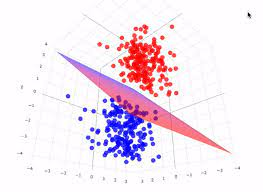

# What is a Support Vector Machine?
1. The Support Vector Machine is a supervised machine learning algorithm that draws decision boundaries between data points of different classes.
2. SVM creates a decision equation through its training data, meaning that you only need to plug in values to make predictions after you are done training.
## Why not use K-nearest Neighbours instead?
K-nearest Neighbours has to compare the distance between the prediction data with all the training data every time you want to make a new prediction, meaning the computation time might be higher if you want to make predictions for huge datasets.


# Explaining the Math

### The point of SVM is to create a decision boundary through support vectors that separates two different classes, which is shown by the dotted boundary line.

<img src="https://images.spiceworks.com/wp-content/uploads/2022/09/02134804/Diagram-depicting-SVM-example-with-hyperplane-for-classification-problem.jpg" alt="Alternative text" />

### Imagine running a vector perpendicular through the decision boundary

<img src="https://editor.analyticsvidhya.com/uploads/885076.png"/>

### That vector is $w$, and it tells how far away a data point is from the decision boundary

### Assuming $x$, which is a data point, as a vector, we can find the magnitude of the projection of $x$ onto $w$, using the formula $$\left\lVert \text{proj}_{\mathbf{W}}(\mathbf{X}) \right\rVert = \frac{\mathbf{X} \cdot \mathbf{W}}{|\mathbf{W}|} 
$$



### This means that we can figure out if a point is on one side of the decision boundary by seeing if the magnitude of its projection unto vector $w$ is greater or less than the distance of vector $w$ from origin to decision boundary 
<img width="400" src="https://miro.medium.com/v2/resize:fit:1400/1*sZAO3DqaDnFg2aeEFm2jCA.png"/>

<h3>What is a projection?</h3>
    <h3>Definition:</h3>
    <p>The projection of vector $A$ unto vector $B$ is equivalent to finding the horizontal component of vector $A$ if vector $B$ was the $x$-axis.</p>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Dot_Product.svg/200px-Dot_Product.svg.png"/>
   

 <h3>Proof of the Formula for the Magnitude of a Projection: </h3>
    <p>Looking at the image above, the magnitude of the projection is equivalent to $\cos(\theta) \cdot |\mathbf{A}|$. To find
     $\cos(\theta)$, we can use the dot product formula $$\mathbf{A} \cdot \mathbf{B} = |\mathbf{A}| \cdot |\mathbf{B}| \cdot \cos(\theta)$$
     By dividing the magnitudes on both sides, we get
      $$\cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}| \cdot |\mathbf{B}|}$$
     Plugging this value for $\cos(\theta)$, we find that magnitude of the projection is 
        $$\left\lVert \text{proj}_{\mathbf{B}}(\mathbf{A}) \right\rVert = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{B}|} 
$$
</p>


### We will set that distance as $C$. We can then create the equation $\frac{\mathbf{X} \cdot \mathbf{W}}{|\mathbf{W}|}=C $ where it represents points on the decision boundary. Using the image above, $\frac{\mathbf{X} \cdot \mathbf{W}}{|\mathbf{W}|}-C<0 $ when the point is yellow, and $\frac{\mathbf{X} \cdot \mathbf{W}}{|\mathbf{W}|}-C>0 $ when the point is blue.

### We will simplify the equation to $y_{\text{i}}(X \cdot W+B)\ge0$ where $B$ is the negative and scaled version of $C$. $y_{\text{i}}$ is equal to $1$ when the point is positive and $-1$ when the point is negative. The blue points in the image above will be the positive points while the yellow points will be the negative sample. This wil simplify the equation without taking away from the utility of the decision equation.


<h3>Why can you change the scaling of$\frac{\mathbf{X} \cdot \mathbf{W}}{|\mathbf{W}|}$and $C$ without any problems?</h3>
    <p>Because we only care about the negativity of the decision equation, it is fine if the scaling is different</p>
    <h5>For example:</h5>
    $X \cdot W+B=-4$ and $\frac{X \cdot W}{2}+\frac{B}{2}=-2$ both mean the points are in the negative sample despite the decision equation being scaled up, thus making the mathematical convenience of taking away $|W|$ more important.


#### In order to allow the SVM to generalize better, we want a margin between the two classes as seen in the image bellow. To create the margin, we change  $y_{\text{i}}(X \cdot W+B)\ge0$ to  $y_{\text{i}}(X \cdot W+B)\ge1$ where 1 represents the distance from the margin border to the decision boundary. This also means that the margin space is equal for both classes to make sure the classification is balanced. We also want the margin to be as big as possible to increase seperation between the two classes, allowing the SVM to handle unseen data better.

<img width="300" src="https://miro.medium.com/v2/resize:fit:1132/1*SgXnNjy8aXR-6ZwaPek0xg.png"/>




### How can you be sure the margin space is just $1$?
##### Even though the margin space is likely to not just be $1$, it doesn't matter since $X \cdot W+B$ will be scaled to correctly match margin width. The $1$ is just used for mathematical convenience.

#### Play around with the graph below to understand what I mean:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

def plot_lines(m):
    x = np.linspace(-10, 10, 100)
    

    y1 = -x  # x + y = 0
    
    epsilon = 1e-5
    if abs(m) > epsilon:
        y2 = (1 / m) - x  # m * (x + y) = 1
        y3 = -(1 / m) - x  # m * (x + y) = -1
    else:
        y2 = np.zeros_like(x)
        y3 = np.zeros_like(x)
    
    plt.plot(x, y1, '-r', label='x + y = 0')
    plt.plot(x, y2, '-g', label=f'm * (x + y) = 1 (m={m:.2f})')
    plt.plot(x, y3, '-b', label=f'm * (x + y) = -1 (m={m:.2f})')
    
    plt.title('Graphs of Equations')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

interactive_plot = interactive(plot_lines, m=(-5, 5, 0.1))

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

### Now that we have the SVM decision equation, we want to figure out how to maximize the margin. To do this, we will use support vectors which are the points closest to the decision boundary that will define the starting point of the margins.

<img src="https://www.edureka.co/blog/wp-content/uploads/2019/11/svm-2.png"/>


### Because the ideal support vectors will be on the margins of the decision lines, we can find the width of the margin by finding the vector that connects the two support vectors.

### We find that vector by subtracting the support vector further from the origin by the other support vector as shown in the image below. We will call that vector $Z$.

$$Z=x_2-x_1$$






<img src="https://i.stack.imgur.com/1bd4E.png"/>

### Because vector $W$ is perpendicular to the margins and decision line, we can equate the magnitude of the projection of $Z$ onto $W$ as the width of the margin.

 $$\left\lVert \text{proj}_{\mathbf{W}}(\mathbf{Z}) \right\rVert = \frac{\mathbf{Z} \cdot \mathbf{W}}{|\mathbf{W}|}$$
 $$\frac{\mathbf{Z} \cdot \mathbf{W}}{|\mathbf{W}|}=\frac{\mathbf{(x_2-x_1)} \cdot \mathbf{W}}{|\mathbf{W}|}=\frac{\mathbf{x_2} \cdot \mathbf{W}-\mathbf{x_1} \cdot  \mathbf{W}}{|\mathbf{W}|}$$




### Using the decision equation, $y_i (W \cdot x+b)=1$, assuming $x_1$ is in the negative class and $x_2$ is in the positive class:
$$W \cdot x_2+b=1$$
Equation 2: $$W \cdot x_2=1-b$$
$$-1 \cdot(W \cdot x_1+b)=1$$
$$W \cdot x_1+b=-1$$
Equation 3: $$ W \cdot x_1=-1-b$$

### Plug $W \cdot x_1$ and $W \cdot x_2$ into the equation for the magnitude of the projection to get:
$$\frac{1-b-(-1-b)}{|\mathbf{W}|}$$
$$\frac{1-b+1+b)}{|\mathbf{W}|}$$
$$\frac{2}{|\mathbf{W}|}$$
### Now that we have seen that the width of the margin created by the support vectors is $\frac{2}{|\mathbf{W}|}$, it is clear that in order to train the SVM model and find the optimal support vectors, we want to maximize the magnitude of vector $W$ such that the classifications of the training data are correct.

### We will now explore the math behind calibrating vector $W$ to create the decision equation. 
### The Hinge Loss Function:

$$L=max(0,1-(X \cdot W+B))$$



### How it works is that if the decision equation is at least $1$, the loss is $0$ since the datapoint has been correctly classified. If the decision equation computes a value less than $1$, the loss is $1-y_{\text{i}}(X \cdot W+B)$ since the lower the loss function's output gets, which means a less accurate classification, the bigger the loss. 

### $J(\lambda, w) = \lambda \cdot \frac{1}{2} \|w\|^2 + \max(0, 1 - y_{\text{i}}\cdot (w \cdot x))$ will be used as the loss function. $\lambda$ is a hyperparameter which determines how much you want $\|w\|^2$ to affect the loss function. Hyperparamaters are a useful tool to control how well the SVM generalizes.


### We will take the partial derivatives of the loss function with respect to $w$ and $b$ to figure out how much these variables should be calibrated to create the decision function. 

$$w=w-\alpha \cdot dw$$
$$b=b-\alpha \cdot db$$






### The $dw$ and $db$ change depending on the value of the decision equation as shown by the max function in the loss function

#### If decision equation, $y_{\text{i}}\cdot (w \cdot x)$, is greater than $1$, the loss function is $\lambda \cdot \frac{1}{2} \|w\|^2$ which means the derivative with respect to $dw$ is $2\lambda w$ and the derivative with respect to $db$ is $0$. If the decision equation is less than $1$, the loss function is $\lambda \cdot \frac{1}{2} \|w\|^2+ 1 - y_{\text{i}}\cdot (w \cdot x)$. This means the derivative with respect to $dw$ is $2\lambda w-y_{\text{i}}\cdot x$. The derivative with respect to $db$ is $y_{\text{i}}$.

### The final result:

#### When the decision equation returns a value greater or equal to $1$ (the classification of the training data was correct):
$$w=w-\alpha \cdot 2\lambda w$$
$$b=b$$

#### When the decision equation returns a value less than $1$ (the classification of the training data was incorrect):
$$w=w-\alpha \cdot (2\lambda w-y_{\text{i}}\cdot x)$$
$$b=b-\alpha \cdot y_{\text{i}}$$

## Gradient Descent
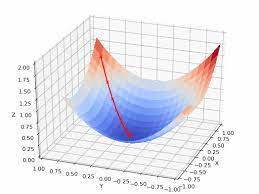





### Why are we subtracting $w$ and $b$ by $dw$ and $db$?

### Looking at the image above, we see a graph of how the loss function with $w$ as $x$, $b$ as $y$ and $J(\lambda,w)$  $z$ if $w$ and $b$ were one dimensional. The goal is to minimize the loss or how much the decision decision is wrong, so we want to reach the minimum. If loss function has a higher value, which means a point with a higher $z$ value in the graph, the partial derivatives will be higher, resulting in a more drastic descent to the bottom. Once it reaches the bottom, the partial derivatives will start to lessen and mingle around zero.Thus we end up with the minimum!


## Implementing The SVM

### Open up a code editor like VSCode and we will create an SVM from scratch!

#### We will

1. Import numpy to work with matrices and arrays.
2. Import train_test_split to split data into training and testing data.
3. Import matplotlib.pyplot to graph the data points


```python
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
```





1. Define an SVM class and create the class constructor. 
2. Define self, learning rate, lambda, and the number of iterations as parameters as shown below.
3. We will set the self variables to the parameter values.
4. Define vector $w$ as “None” along with $b$.
5. self.color will be the help differentiate different classes when graphing.



```python
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
```

1. Define a fit function in SVM with self, the input data, and class identifier as parameters.
2. $X$.shape gets the dimension of the array. 
3. The number of features is the length of each input array. n_samples is the number of input arrays.
4. y_ is the class identifiers ($-1$ or $1$) assigned to each input array, so y_ will have the same length as n_samples.
5. Vector $w$ will have the same number of dimensions as the input count, and the value of each of its dimensions will be set to $0$.
6. $b$ will also be set to $0$ as the starting value.


```python 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        y_=np.where(y<=0,-1,1)
        self.w=np.zeros(n_features)
        self.b=0
```

1. Create a for-loop with n_iters as the looping variable
2. n_iters defines how many times you want to fit vector $w$.
3. We then iterate through the input data.
4. we use enumerate to allow the for-loop to access the index of each input array and the array itself.
5. idx is the index of the input array, and x_i is the individual input array.
6. The code in each iteration uses the Hinge Loss function and Regularization concepts.
7. Basically, vector w and b will be altered differently depending on how well the decision function works.


```python
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        y_=np.where(y<=0,-1,1)
        self.w=np.zeros(n_features)
        self.b=0
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(x):
                if(y_[idx]*(np.dot(x_i,self.w)+self.b)>=1):
                    self.w-=self.lr*2*self.lambda_param*self.w
                else:
                    self.w-=self.lr*(2*self.lambda_param*self.w-np.dot(y_[idx],x_i))
                    self.b+=self.lr*y_[idx]
```

1. Define the predict function with self and the prediction inputs as its parameters.
2. The results will store the classification of each prediction input.
3. Iterate through each input array, and if plugging the input array into the decision function nets a negative sign, -1 is appended to results. If else, 1 is appended to results.
4. The results array is returned.


```python
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        y_=np.where(y<=0,-1,1)
        self.w=np.zeros(n_features)
        self.b=0
        
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(x):
                if(y_[idx]*(np.dot(x_i,self.w)+self.b)>=1):
                    self.w-=self.lr*2*self.lambda_param*self.w
                else:
                    self.w-=self.lr*(2*self.lambda_param*self.w-np.dot(y_[idx],x_i))
                    self.b+=self.lr*y_[idx]
    def predict(self,x):
        results=[]
        for x_ in x:
            prediction=np.dot(self.w,x_)+self.b
            results.append(np.sign(prediction))
        return results
```
    

1. Define visualize with self, the training inputs, the training data classifications, and the predictions and their predicted classes as parameters.
2. Define a plot figure, which will contain the plot elements.
3. Define a subplot in the figure that allows the decision and margin lines to be plotted next to the input and prediction points.
4. Enumerate x to be able to iterate through the input arrays and get their indexes.
5. Plot the inputs as dots, and set the color based on the classification.
6. Scatter the prediction inputs the same way except their marker will be an ‘x’ and they will have a larger size.


```python
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        y_=np.where(y<=0,-1,1)
        self.w=np.zeros(n_features)
        self.b=0
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(x):
                if(y_[idx]*(np.dot(x_i,self.w)+self.b)>=1):
                    self.w-=self.lr*2*self.lambda_param*self.w
                else:
                    self.w-=self.lr*(2*self.lambda_param*self.w-np.dot(y_[idx],x_i))
                    self.b+=self.lr*y_[idx]
    def predict(self,x):
        results=[]
        for x_ in x:
            prediction=np.dot(self.w,x_)+self.b
            results.append(np.sign(prediction))
        return results
    def visualize(self,x,y,predictions,predictY):
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
        [plt.scatter(x_[0],x_[1],s=100,color=self.color[y[h]]) for h,x_ in enumerate(x)]
        
        [plt.scatter(x_[0],x_[1],marker='x',s=150,color=self.color[predictY[h]]) for h,x_ in enumerate(predictions)]
```

1. Define the hyperplane function with $z$, vector $w$, $b$, and the offset value as the parameters. This function will graph the decision boundary and the margin lines.
2. To find the linear function of the decision line, we can use the decision function. Let $x_2$ be the y-value of our graph:
      $$w \cdot x+b=0$$
      $$[w_1,w_2] \cdot [x_1, x_2]^T+b=0$$
      $$w_1 \cdot x_1+w_2 \cdot x_2+b=0$$
      $$w_2 \cdot x_2=-b-w_1 \cdot x_1$$
      $$x_2=\frac{-b-w_1 \cdot x_1}{w_2}$$



1. The reason there is only $x_1$ and $x_2$ is because I want to graph the decision function and its boundaries which is only possible if there are only two dimensions to the input.
2. We get the maximum $x_1$ value in the dataset and the minimum value to make sure all the other datapoints are shown in the graph. This is because the x-values of the points used to create the graph dictate the x-window of the graph.
3. We are basically getting the dot product of $w$ and $x$ and isolate the $x_2$ value to get the corresponding y-values on the decision line.
4. If you want to find the linear function of the hard margin, set the decision equation to 1 or -1, and isolate $x_2$ from the dot product. 

1. Let the offset value ($1$ or $-1$) be $y_i$:
$$w \cdot x+b=y_i$$
      $$[w_1,w_2] \cdot [x_1, x_2]^T+b=y_i$$
      $$w_1 \cdot x_1+w_2 \cdot x_2+b=y_i$$
      $$w_2 \cdot x_2=y_i-b-w_1 \cdot x_1$$
      $$x_2=\frac{y_i-b-w_1 \cdot x_1}{w_2}$$
2. Replace $y_i$ with variable $offset$, which equals $0$,$1$, and $-1$, depending on if you want to find the $y$ values of points on the decision line or the hard margins. This is how you get the hyperplane function in the code below.
3. The hyperplane function calls are used to get the y-values of the left-most and right-most points on the decision line and hard margins.


```python
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        y_=np.where(y<=0,-1,1)
        self.w=np.zeros(n_features)
        self.b=0
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(x):
                if(y_[idx]*(np.dot(x_i,self.w)+self.b)>=1):
                    self.w-=self.lr*2*self.lambda_param*self.w
                else:
                    self.w-=self.lr*(2*self.lambda_param*self.w-np.dot(y_[idx],x_i))
                    self.b+=self.lr*y_[idx]
    def predict(self,x):
        results=[]
        for x_ in x:
            prediction=np.dot(self.w,x_)+self.b
            results.append(np.sign(prediction))
        return results 
    def visualize(self,x,y,predictions,predictY):
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
        [plt.scatter(x_[0],x_[1],s=100,color=self.color[y[h]]) for h,x_ in enumerate(x)]
        
        [plt.scatter(x_[0],x_[1],marker='x',s=150,color=self.color[predictY[h]]) for h,x_ in enumerate(predictions)]
        def hyperplane(z,w,b,offset):
            return (-w[0]*z-b+offset)/w[1]
        x0_1=np.amin(x[:,0])
        x0_2=np.amax(x[:,0])
        x1_1=hyperplane(x0_1,self.w,self.b,0)
        x1_2=hyperplane(x0_2,self.w,self.b,0)
        x2_1=hyperplane(x0_1,self.w,self.b,-1)
        x2_2=hyperplane(x0_2,self.w,self.b,-1)
        x3_1=hyperplane(x0_1,self.w,self.b,1)
        x3_2=hyperplane(x0_2,self.w,self.b,1)
```

1. Plot the lines. 
2. “y- -” creates a dashed line while “k” is a smooth line
3. x1_min and x1_max are the least and greatest y-values in the training input data.
4. ax.set_ylim sets the y-window of the graph or the range of y-values that should be shown.
5. Show the plot.


```python
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        y_=np.where(y<=0,-1,1)
        self.w=np.zeros(n_features)
        self.b=0
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(x):
                if(y_[idx]*(np.dot(x_i,self.w)+self.b)>=1):
                    self.w-=self.lr*2*self.lambda_param*self.w
                else:
                    self.w-=self.lr*(2*self.lambda_param*self.w-np.dot(y_[idx],x_i))
                    self.b+=self.lr*y_[idx]
    def predict(self,x):
        results=[]
        for x_ in x:
            prediction=np.dot(self.w,x_)+self.b
            results.append(np.sign(prediction))
        return results 
    def visualize(self,x,y,predictions,predictY):
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
        [plt.scatter(x_[0],x_[1],s=100,color=self.color[y[h]]) for h,x_ in enumerate(x)]
        
        [plt.scatter(x_[0],x_[1],marker='x',s=150,color=self.color[predictY[h]]) for h,x_ in enumerate(predictions)]
        def hyperplane(z,w,b,offset):
            return (-w[0]*z-b+offset)/w[1]
        x0_1=np.amin(x[:,0])
        x0_2=np.amax(x[:,0])
        x1_1=hyperplane(x0_1,self.w,self.b,0)
        x1_2=hyperplane(x0_2,self.w,self.b,0)
        x2_1=hyperplane(x0_1,self.w,self.b,-1)
        x2_2=hyperplane(x0_2,self.w,self.b,-1)
        x3_1=hyperplane(x0_1,self.w,self.b,1)
        x3_2=hyperplane(x0_2,self.w,self.b,1)
        ax.plot([x0_1,x0_2],[x1_1,x1_2],"y--")
        ax.plot([x0_1,x0_2],[x2_1,x2_2],"k")
        ax.plot([x0_1,x0_2],[x3_1,x3_2],"k")
        x1_min = np.amin(x[:, 1])
        x1_max = np.amax(x[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])
        plt.show()
```

### We can now train an SVM model around a dataset.

#### 1. Create a $3$-dimensional array called $x$ where the dimensions are the number of datapoints, the x-value of the datapoint, and the y-value of the datapoint.
#### 2. Create a $1$-dimensional array called $y$ where each value is either a $1$ or $-1$ to signify the classification of the point.
#### 3. Create the dataset yourself, but you can use the one I created. 
#### 4. Make sure the first dimensions of $x$ and $y$ have the same length.
#### 5. Make sure the arrays are numpy arrays as shown in the code below.

```python
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        y_=np.where(y<=0,-1,1)
        self.w=np.zeros(n_features)
        self.b=0
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(x):
                if(y_[idx]*(np.dot(x_i,self.w)+self.b)>=1):
                    self.w-=self.lr*2*self.lambda_param*self.w
                else:
                    self.w-=self.lr*(2*self.lambda_param*self.w-np.dot(y_[idx],x_i))
                    self.b+=self.lr*y_[idx]
    def predict(self,x):
        results=[]
        for x_ in x:
            prediction=np.dot(self.w,x_)+self.b
            results.append(np.sign(prediction))
        return results 
    def visualize(self,x,y,predictions,predictY):
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
        [plt.scatter(x_[0],x_[1],s=100,color=self.color[y[h]]) for h,x_ in enumerate(x)]
        
        [plt.scatter(x_[0],x_[1],marker='x',s=150,color=self.color[predictY[h]]) for h,x_ in enumerate(predictions)]
        def hyperplane(z,w,b,offset):
            return (-w[0]*z-b+offset)/w[1]
        x0_1=np.amin(x[:,0])
        x0_2=np.amax(x[:,0])
        x1_1=hyperplane(x0_1,self.w,self.b,0)
        x1_2=hyperplane(x0_2,self.w,self.b,0)
        x2_1=hyperplane(x0_1,self.w,self.b,-1)
        x2_2=hyperplane(x0_2,self.w,self.b,-1)
        x3_1=hyperplane(x0_1,self.w,self.b,1)
        x3_2=hyperplane(x0_2,self.w,self.b,1)
        ax.plot([x0_1,x0_2],[x1_1,x1_2],"y--")
        ax.plot([x0_1,x0_2],[x2_1,x2_2],"k")
        ax.plot([x0_1,x0_2],[x3_1,x3_2],"k")
        x1_min = np.amin(x[:, 1])
        x1_max = np.amax(x[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])
        plt.show()
x=np.array([[1,-3],[1,8],[6,7],[8,9],[11,10],[1,2],[0,3],[-1,4],[2,2],[16,7],[-3,-2],[17,10],[5,2],[3,-10],[-8,-8],[3,2],[12,14],[7,8],[23,11],[9,11],[-2,4],[-10,2],[3,3],[1,3],[6,6],[6,9],[7,9],[8,10]])
y=np.array([-1,1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1])
```

#### 1. Split the dataset into training and testing data, where the test_size indicates how much of the dataset you want to use to test your SVM model
#### 2. Create the SVM object 
#### 3. Fit the SVM model around the training data
#### 4. Used the trained model to predict the classifications for the testing data
#### 5. Create an "accuracy" function. which will take the actual classifications and predicted classifications to calculate accuracy of the model
#### 6. Accuracy is basically the proportion of classifications ($1$ or $-1$) that are correct with the total amount of classifications
#### 7. Print out the predictions and accuracy if you want
#### 8. Visualize your data and the SVM classifications

### The Full Code With Implementation:
```python
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        y_=np.where(y<=0,-1,1)
        self.w=np.zeros(n_features)
        self.b=0
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(x):
                if(y_[idx]*(np.dot(x_i,self.w)+self.b)>=1):
                    self.w-=self.lr*2*self.lambda_param*self.w
                else:
                    self.w-=self.lr*(2*self.lambda_param*self.w-np.dot(y_[idx],x_i))
                    self.b+=self.lr*y_[idx]
    def predict(self,x):
        results=[]
        for x_ in x:
            prediction=np.dot(self.w,x_)+self.b
            results.append(np.sign(prediction))
        return results 
    def visualize(self,x,y,predictions,predictY):
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
        [plt.scatter(x_[0],x_[1],s=100,color=self.color[y[h]]) for h,x_ in enumerate(x)]
        
        [plt.scatter(x_[0],x_[1],marker='x',s=150,color=self.color[predictY[h]]) for h,x_ in enumerate(predictions)]
        def hyperplane(z,w,b,offset):
            return (-w[0]*z-b+offset)/w[1]
        x0_1=np.amin(x[:,0])
        x0_2=np.amax(x[:,0])
        x1_1=hyperplane(x0_1,self.w,self.b,0)
        x1_2=hyperplane(x0_2,self.w,self.b,0)
        x2_1=hyperplane(x0_1,self.w,self.b,-1)
        x2_2=hyperplane(x0_2,self.w,self.b,-1)
        x3_1=hyperplane(x0_1,self.w,self.b,1)
        x3_2=hyperplane(x0_2,self.w,self.b,1)
        ax.plot([x0_1,x0_2],[x1_1,x1_2],"y--")
        ax.plot([x0_1,x0_2],[x2_1,x2_2],"k")
        ax.plot([x0_1,x0_2],[x3_1,x3_2],"k")
        x1_min = np.amin(x[:, 1])
        x1_max = np.amax(x[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])
        plt.show()
x=np.array([[1,-3],[1,8],[6,7],[8,9],[11,10],[1,2],[0,3],[-1,4],[2,2],[16,7],[-3,-2],[17,10],[5,2],[3,-10],[-8,-8],[3,2],[12,14],[7,8],[23,11],[9,11],[-2,4],[-10,2],[3,3],[1,3],[6,6],[6,9],[7,9],[8,10]])
y=np.array([-1,1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=SVM()
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
def accuracy(true,predict):
    accurate=np.sum(true==predict)/len(true)
    return accurate

print(predictions)
print(accuracy(y_test,clf.predict(x_test)))

clf.visualize(x_train,y_train,x_test,predictions)
```

[1.0, -1.0, -1.0, 1.0, 1.0, -1.0]
1.0


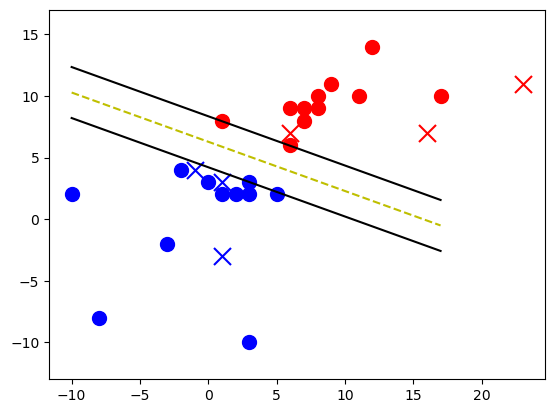

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=10000):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
        self.color={1:'red',-1:'blue'}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        y_=np.where(y<=0,-1,1)
        self.w=np.zeros(n_features)
        self.b=0
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(x):
                if(y_[idx]*(np.dot(x_i,self.w)+self.b)>=1):
                    self.w-=self.lr*2*self.lambda_param*self.w
                else:
                    self.w-=self.lr*(2*self.lambda_param*self.w-np.dot(y_[idx],x_i))
                    self.b+=self.lr*y_[idx]
    def predict(self,x):
        results=[]
        for x_ in x:
            prediction=np.dot(self.w,x_)+self.b
            results.append(np.sign(prediction))
        return results 
    def visualize(self,x,y,predictions,predictY):
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
        [plt.scatter(x_[0],x_[1],s=100,color=self.color[y[h]]) for h,x_ in enumerate(x)]
        
        [plt.scatter(x_[0],x_[1],marker='x',s=150,color=self.color[predictY[h]]) for h,x_ in enumerate(predictions)]
        def hyperplane(z,w,b,offset):
            return (-w[0]*z-b+offset)/w[1]
        x0_1=np.amin(x[:,0])
        x0_2=np.amax(x[:,0])
        x1_1=hyperplane(x0_1,self.w,self.b,0)
        x1_2=hyperplane(x0_2,self.w,self.b,0)
        x2_1=hyperplane(x0_1,self.w,self.b,-1)
        x2_2=hyperplane(x0_2,self.w,self.b,-1)
        x3_1=hyperplane(x0_1,self.w,self.b,1)
        x3_2=hyperplane(x0_2,self.w,self.b,1)
        ax.plot([x0_1,x0_2],[x1_1,x1_2],"y--")
        ax.plot([x0_1,x0_2],[x2_1,x2_2],"k")
        ax.plot([x0_1,x0_2],[x3_1,x3_2],"k")
        x1_min = np.amin(x[:, 1])
        x1_max = np.amax(x[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])
        plt.show()
x=np.array([[1,-3],[1,8],[6,7],[8,9],[11,10],[1,2],[0,3],[-1,4],[2,2],[16,7],[-3,-2],[17,10],[5,2],[3,-10],[-8,-8],[3,2],[12,14],[7,8],[23,11],[9,11],[-2,4],[-10,2],[3,3],[1,3],[6,6],[6,9],[7,9],[8,10]])
y=np.array([-1,1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=SVM()
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
def accuracy(true,predict):
    accurate=np.sum(true==predict)/len(true)
    return accurate

print(predictions)
print(accuracy(y_test,clf.predict(x_test)))

clf.visualize(x_train,y_train,x_test,predictions)


### Experiment!
#### Create random datasets to see how the SVM draws the decision boundary
#### Try creating datasets that might not seem linearly separable, and see how SVM does there.
#### Experiment with the lambda, training rate, and n_iter values, which can be set during the creation of the SVM object


### Final Words
#### Now that you know how the basic SVM algorithm works, you can use this machine learning algorithm into your projects to classify new data based on a dataset.
#### For example, it can be used to handwriting recognition apps, gene classification, and many more classification problems. 
#### SVM is powerful in that once you fit the data and get the decision function, predictions can be made as easily as plugging in the input and seeing if the decision function outputs a negative or positive value.
#### If you want to use SVM, I would recommend using sklearn’s algorithm, as it should have OVO, OVR, kernels, and soft margin capabilities, while the algorithm we wrote today was only to help you understand SVM.


### More Resources
#### Understanding sklearn’s SVM: 
#### https://scikit-learn.org/stable/modules/svm.html
#### Further Your Understanding of SVM’s Potential:
#### https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/#:~:text=%E2%80%9CSupport%20Vector%20Machine%E2%80%9D%20
#### Kernels:
#### https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/#:~:text=%E2%80%9CKernel%E2%80%9D%20is%20used%20due%20to,higher%20number%20of%20dimension%20spaces.
#### Soft Margin: 
#### https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe?gi=651bfa1b4111
#### Multi-class Classification: 
#### https://www.baeldung.com/cs/svm-multiclass-classification
